# Coursera_Capstone
This notebook will be mainly used for the capstone project.


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv("/content/drive/My Drive/Coursera/Capstone/US_Accidents_June20.csv")

In [7]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [9]:
df.shape

(3513617, 49)

In [10]:
df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [11]:
for column in df:
    print(df[column].isna().sum())
    print(column)

0
ID
0
Source
1034799
TMC
0
Severity
0
Start_Time
0
End_Time
0
Start_Lat
0
Start_Lng
2478818
End_Lat
2478818
End_Lng
0
Distance(mi)
1
Description
2262864
Number
0
Street
0
Side
112
City
0
County
0
State
1069
Zipcode
0
Country
3880
Timezone
6758
Airport_Code
43323
Weather_Timestamp
65732
Temperature(F)
1868249
Wind_Chill(F)
69687
Humidity(%)
55882
Pressure(in)
75856
Visibility(mi)
58874
Wind_Direction
454609
Wind_Speed(mph)
2025874
Precipitation(in)
76138
Weather_Condition
0
Amenity
0
Bump
0
Crossing
0
Give_Way
0
Junction
0
No_Exit
0
Railway
0
Roundabout
0
Station
0
Stop
0
Traffic_Calming
0
Traffic_Signal
0
Turning_Loop
115
Sunrise_Sunset
115
Civil_Twilight
115
Nautical_Twilight
115
Astronomical_Twilight


In [12]:
df = df.drop(columns=['Distance(mi)', 'Description', 'City', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'TMC', \
                      'End_Lat','End_Lng', 'Number', 'Wind_Chill(F)', 'Wind_Speed(mph)', 'Precipitation(in)', 'ID', 'Source',\
                      'Street','County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'End_Time'])

In [14]:
df = df.sample(frac=0.05)

In [15]:
df.shape

(17568, 25)

In [16]:
df.fillna(method='ffill', inplace=True)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def missing_values_heatmap(df):
    fig, ax = plt.subplots(figsize=(30,12))
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma',ax=ax)
    ax.set_title('Missing Values Heatmap', fontdict=font)
    fig.savefig(OUTPUT_PATH+'missing-heatmap_'+ time.strftime('%Y%m%d-%H%M%S') + '.png')

def cor_matrix(df):
    fig, ax = plt.subplots(figsize=(30,12))

    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            ax=ax)

    ax.set_title('Correlation Matrix')

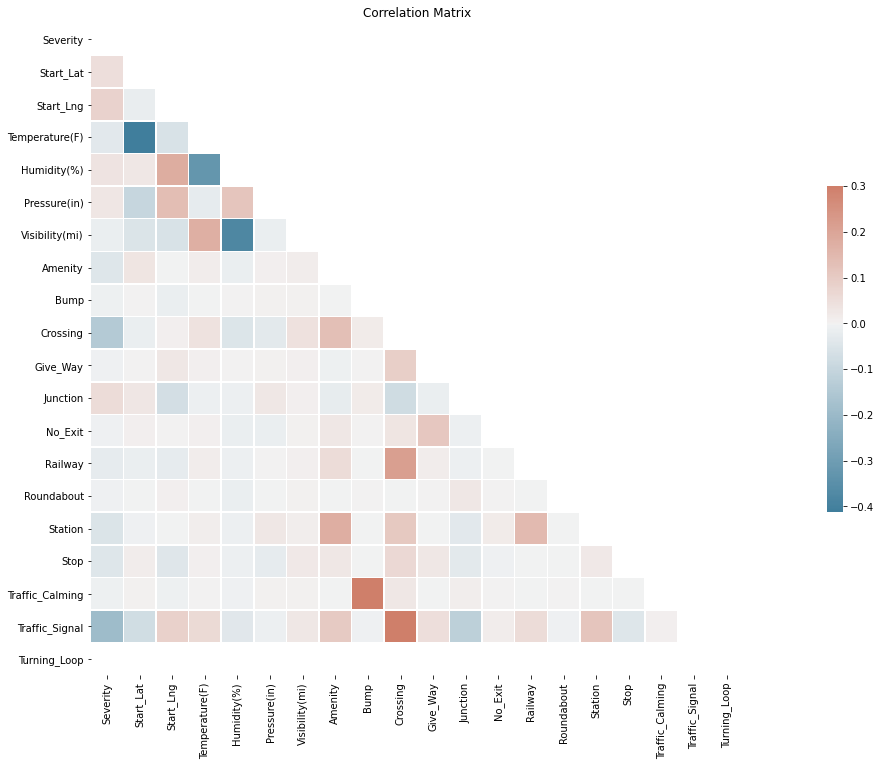

In [18]:
cor_matrix(df)

In [19]:
df.drop('Traffic_Signal', axis=1, inplace=True)

In [20]:
df['Start_Time']= pd.to_datetime(df['Start_Time'])
df['date'] = [d.date() for d in df['Start_Time']]
df['time'] = [d.time() for d in df['Start_Time']]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17568 entries, 1315646 to 2181970
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Severity           17568 non-null  int64         
 1   Start_Time         17568 non-null  datetime64[ns]
 2   Start_Lat          17568 non-null  float64       
 3   Start_Lng          17568 non-null  float64       
 4   Side               17568 non-null  object        
 5   Temperature(F)     17568 non-null  float64       
 6   Humidity(%)        17568 non-null  float64       
 7   Pressure(in)       17568 non-null  float64       
 8   Visibility(mi)     17568 non-null  float64       
 9   Wind_Direction     17568 non-null  object        
 10  Weather_Condition  17568 non-null  object        
 11  Amenity            17568 non-null  bool          
 12  Bump               17568 non-null  bool          
 13  Crossing           17568 non-null  bool          
 14

In [22]:
df['date']= pd.to_datetime(df['date'])
df['dayofweek'] = df['date'].dt.dayofweek
df['hour'] = df['Start_Time'].dt.hour
df['weekend']= df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.drop('Start_Time', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)
df.drop('time', axis=1, inplace=True)


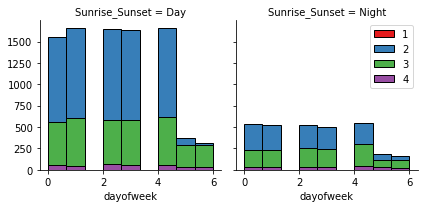

In [23]:
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Sunrise_Sunset", hue="Severity", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()

plt.show()

In [24]:
df.dtypes

Severity               int64
Start_Lat            float64
Start_Lng            float64
Side                  object
Temperature(F)       float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Give_Way                bool
Junction                bool
No_Exit                 bool
Railway                 bool
Roundabout              bool
Station                 bool
Stop                    bool
Traffic_Calming         bool
Turning_Loop            bool
Sunrise_Sunset        object
dayofweek              int64
hour                   int64
weekend                int64
dtype: object

In [25]:
categorial_cols = list(df.select_dtypes(include=['object']).dtypes.index)
categorial_cols

['Side', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset']

In [26]:
features = list(set(list(df.dtypes.index)) - set(categorial_cols))
features

['Temperature(F)',
 'Railway',
 'Station',
 'Humidity(%)',
 'Give_Way',
 'Traffic_Calming',
 'Turning_Loop',
 'Crossing',
 'Bump',
 'Visibility(mi)',
 'weekend',
 'Start_Lat',
 'Roundabout',
 'Amenity',
 'No_Exit',
 'Junction',
 'Pressure(in)',
 'hour',
 'Stop',
 'dayofweek',
 'Severity',
 'Start_Lng']

In [27]:
df.shape

(17568, 26)

In [28]:
df = pd.concat([df[features],pd.get_dummies(df[categorial_cols])], axis=1)
df.shape

(17568, 104)

In [29]:
y = df['Severity']
X = df.drop('Severity', axis = 1)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12297, 103)
(5271, 103)
(12297,)
(5271,)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
# Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.56839309, 0.63669133, 0.61070006, 0.64750522, 0.64029596,
       0.65680137, 0.64807437, 0.65566306, 0.651679  , 0.65774995,
       0.65623221, 0.65737052, 0.65414532, 0.65528363])

In [35]:
# Building the model again, using k=10
from sklearn.neighbors import KNeighborsClassifier
k = 10
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [36]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
from sklearn import svm
SVM_model = svm.SVC()

SVM_model.fit(X_train, y_train) 
SVM_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


mdl_rf=RandomForestClassifier(n_estimators=250)

mdl_rf.fit(X_train,y_train)

predictions=mdl_rf.predict(X_test)

print("Randon forest model, accuracy_score:",accuracy_score(y_test, predictions))
print('\n')
print('Confusion matrix')
print(confusion_matrix(y_test,predictions))
print('\n')
print('Classificaiton report')
print(classification_report(y_test,predictions))

Randon forest model, accuracy_score: 0.6799468791500664


Confusion matrix
[[   0   33    4    0]
 [   0 3254  236    0]
 [   0 1245  330    1]
 [   0  137   31    0]]


Classificaiton report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        37
           2       0.70      0.93      0.80      3490
           3       0.55      0.21      0.30      1576
           4       0.00      0.00      0.00       168

    accuracy                           0.68      5271
   macro avg       0.31      0.29      0.28      5271
weighted avg       0.63      0.68      0.62      5271



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

knn_yhat = kNN_model.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

DT_yhat = DT_model.predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, DT_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )

SVM_yhat = SVM_model.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )

LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


KNN Jaccard index: 0.66
KNN F1-score: 0.57
DT Jaccard index: 0.67
DT F1-score: 0.57
SVM Jaccard index: 0.66
SVM F1-score: 0.53
LR Jaccard index: 0.66
LR F1-score: 0.54
LR LogLoss: 0.73


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [50]:
pd_report = pd.DataFrame()
algo_list = ['KNN', 'Decision Tree', 'SVM', 'Logistic regression']
models_list = [kNN_model, DT_model, SVM_model, LR_model]
metrics_values = []

for i, model in enumerate(models_list):
    #model.fit(X,y)
    yhat_eval = model.predict(X_test)
    pd_report.loc[i, 'Jaccard'] = jaccard_similarity_score(y_test, yhat_eval)
    pd_report.loc[i, 'F1-score'] = f1_score(y_test, yhat_eval, average='weighted')
lg_loan_status_probas = LR_model.predict_proba(X_test)
lg_log_loss = log_loss(y_test, lg_loan_status_probas)
pd_report.loc[3,'LogLoss'] = lg_log_loss
    
pd_report.index = algo_list
pd_report

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/me

,Jaccard,F1-score,LogLoss
KNN,0.657750,0.567507,NaN
Decision Tree,0.671030,0.573385,NaN
SVM,0.662113,0.527514,NaN
Logistic regression,0.664769,0.542122,0.729067


No handles with labels found to put in legend.


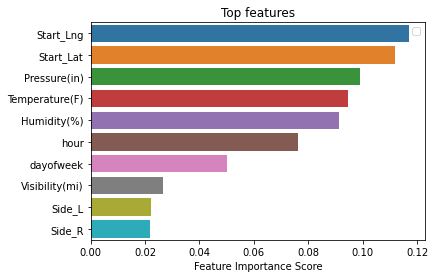

In [51]:
feature_i = pd.Series(mdl_rf.feature_importances_,index=X.columns).sort_values(ascending=False)
# k top features
k=10
sns.barplot(x=feature_i[:10], y=feature_i.index[:k])
plt.xlabel('Feature Importance Score')
plt.title("Top features")
plt.legend()
plt.show()

In [60]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          score_str=None,
                          figsize=None,
                          cmap='Blues',
                          title=None,
                          elapsed_time=None,
                          ax=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    if ax == None:
      fig, ax = plt.subplots(figsize=figsize)
      
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories, ax=ax)

    if xyplotlabels:
        ax.set_ylabel('True label')
        ax.set_xlabel('Predicted label' + stats_text)
    else:
        ax.set_xlabel(stats_text)

    if score_str:
      extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0, alpha=0.2)
      ax.legend([extra], [score_str], loc='upper center')
    
    if title:
      if elapsed_time:
        title = title + '\n Eval in {:.2f} sec'.format(elapsed_time)
      ax.set_title(title)

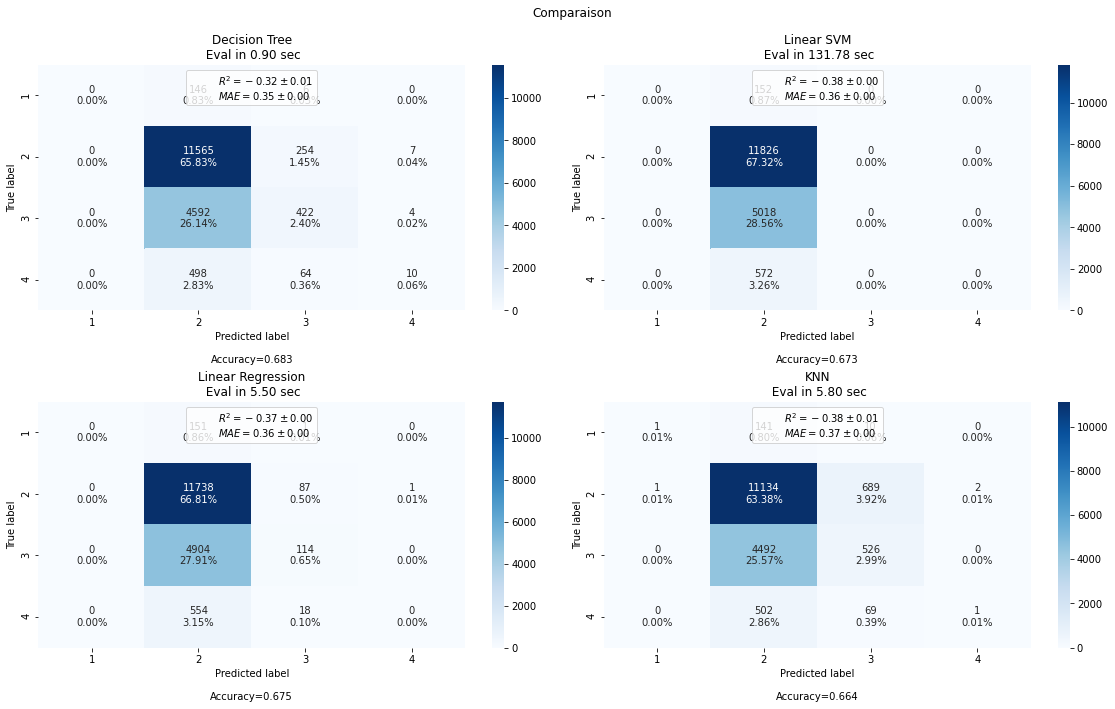

In [62]:
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix


models_list = [kNN_model, DT_model, SVM_model, LR_model]


estimators = [('Decision Tree', DT_model),
              ('Linear SVM', SVM_model),
              ('Linear Regression', LR_model),
              ('KNN', kNN_model)]


results_list = []

categories = ['1', '2', '3', '4']



fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = np.ravel(axs)



for ax, (name, est) in zip(axs, estimators):
#for ax, (name, est) in zip(axs, estimators):
    
    start_time = time.time()

    score = cross_validate(est, X, y,
                           scoring=['r2', 'neg_mean_absolute_error'],
                           n_jobs=-1, verbose=0)
    
    score_str = (r'$R^2={:.2f} \pm {:.2f}$' + '\n' \
                 + r'$MAE={:.2f} \pm {:.2f}$'
                 ).format(np.mean(score['test_r2']),
                  np.std(score['test_r2']),
                  -np.mean(score['test_neg_mean_absolute_error']),
                  np.std(score['test_neg_mean_absolute_error']))
    
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, X, y, n_jobs=-1, verbose=0)

    cf_matrix = confusion_matrix(y, y_pred)

    results_list.append(cf_matrix)

    make_confusion_matrix(cf_matrix, 
                            title=name, 
                            categories=categories, 
                            score_str=score_str,
                            elapsed_time=elapsed_time,
                            ax=ax)
      #sns.heatmap(cf_matrix/np.sum(cf_matrix), 
                  #annot=True, 
                  #fmt='.2%', 
                  #cmap='Blues',
                  #ax=ax)      

plt.suptitle('Comparison')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()
